In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from trainer import Trainer
from model import LSTM

<IPython.core.display.Javascript object>


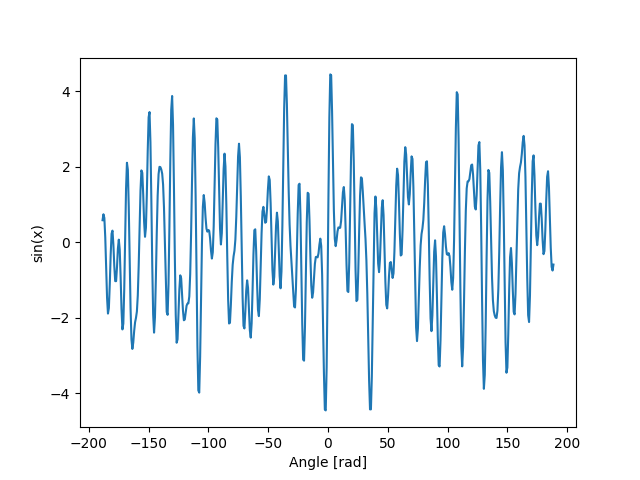

In [2]:
%matplotlib notebook
x = np.linspace(-60*np.pi, 60*np.pi, 500)
out = np.sin(x)+np.sin(0.71*x)+np.sin(0.12*x)+np.sin(0.32*x)+np.sin(0.66*x)+np.sin(0.48*x)
plt.plot(x, out)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [3]:
input_sequence_length = 20
output_predicted_length = 2
shift_per_batch = 1
epochs = 100
batch_size = 5

batch_num = (len(out)-input_sequence_length+shift_per_batch)/shift_per_batch - output_predicted_length

x = np.array([out[i:i+input_sequence_length] 
           for i in range(int(batch_num))])
y = np.array([out[i+input_sequence_length:i+input_sequence_length+output_predicted_length] 
           for i in range(int(batch_num))])

x_train = torch.from_numpy(x[:round(x.shape[0]*0.7),:]).unsqueeze(-1).float()
x_test = torch.from_numpy(x[round(x.shape[0]*0.7):,:]).unsqueeze(-1).float()
y_train = torch.from_numpy(y[:round(y.shape[0]*0.7),:]).unsqueeze(-1).float()
y_test = torch.from_numpy(y[round(y.shape[0]*0.7):,:]).unsqueeze(-1).float()

In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([335, 20, 1]),
 torch.Size([144, 20, 1]),
 torch.Size([335, 2, 1]),
 torch.Size([144, 2, 1]))

In [5]:
x_train.chunk(round(x_train.size(0)/batch_size), dim=0)[0].shape

torch.Size([5, 20, 1])

In [6]:
trainer = Trainer(input_size = 1, 
                  hidden_size = 60,
                  batch_size = batch_size,
                  output_dim = output_predicted_length, 
                  num_layers = 2,
                  learning_rate = 0.01)

In [7]:
out = trainer.predict(x_train)
# out[0].shape

TypeError: forward() missing 1 required positional argument: 'hx'

In [19]:
torch.stack(out).squeeze(1).shape

torch.Size([67, 20, 5, 2])

In [10]:
for t in range(epochs):
    y_pred = trainer.predict(x_train)
    trainer.learn(y_pred,y_train)

RuntimeError: input and target shapes do not match: input [20 x 335 x 2], target [2 x 335 x 1] at /pytorch/aten/src/THNN/generic/MSECriterion.c:13